#### Frame the problem
* the objective of the project is to create a model that predicts which passengers survived the Titanic shipwreck. 
* the model will be Supervised, Offline.
* the performance will be measured by Confusion Matrix,roc,auc,accuracy.


# Importing lib

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn_processing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,make_scorer,f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_regression

# pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset

# Load Data

In [5]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

#  Data Exploration

In [6]:
data = train.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


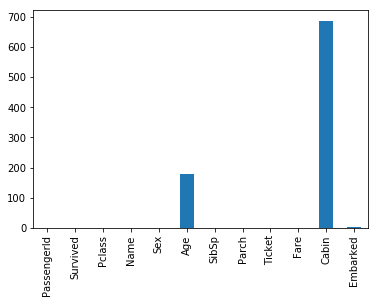

In [10]:
# Visualizing how many null values.
data_null = data.isna().sum()
data_null.plot.bar()

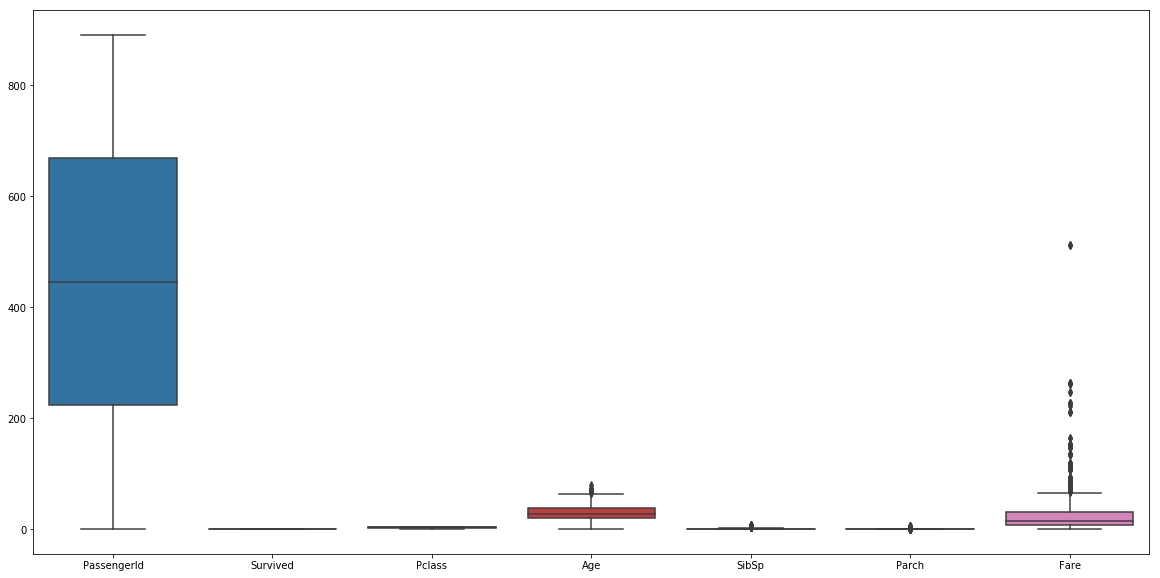

In [11]:
# Noisiness & Outliers check
data_num = data.select_dtypes('number')
plt.figure(figsize=(20,10))
sns.boxplot(data=data_num)

C:\Users\piush\AppData\Local\Continuum\anaconda3\envs\pytorchenv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\piush\AppData\Local\Continuum\anaconda3\envs\pytorchenv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\piush\AppData\Local\Continuum\anaconda3\envs\pytorchenv\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\piush\AppData\Local\Continuum\anaconda3\envs\pytorchenv\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


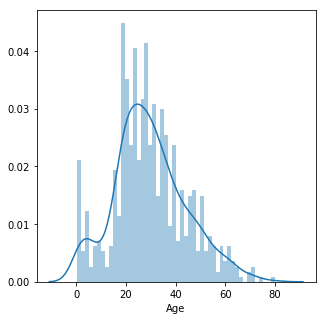

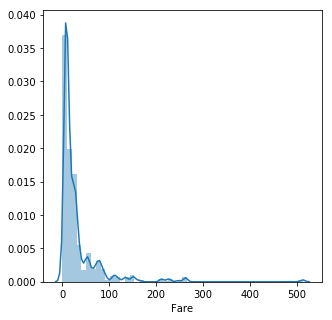

In [12]:
# data distribution:
for col in ['Age','Fare']:
    plt.figure(figsize=(5,5))
    sns.distplot(data_num[col],bins=50,kde = True)

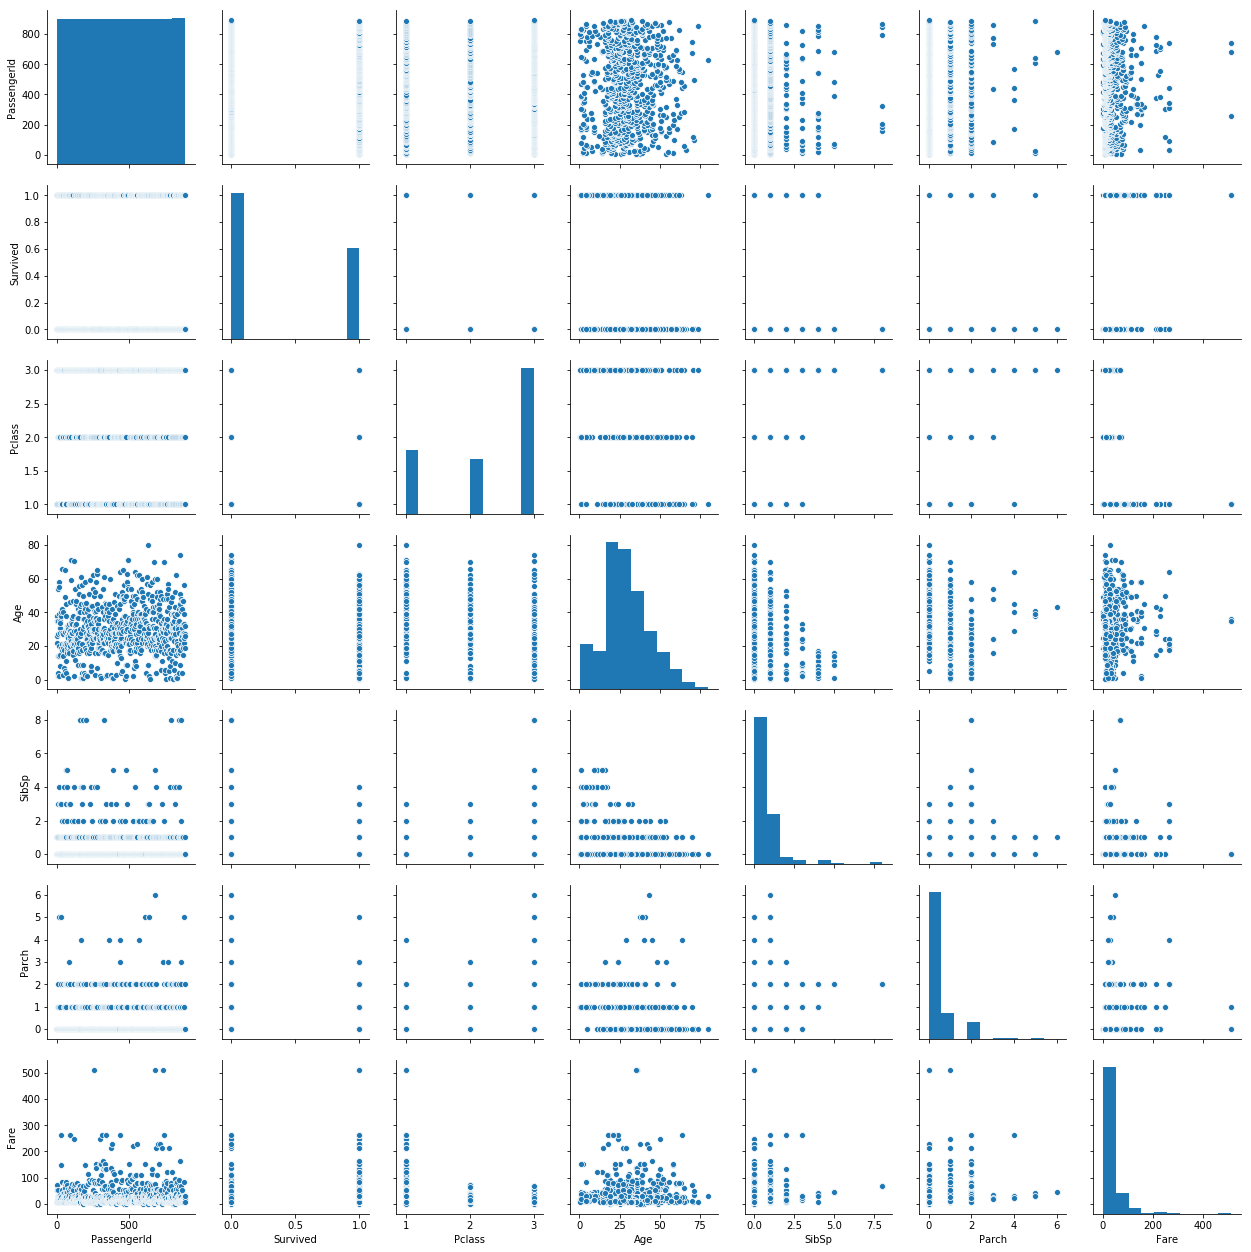

In [13]:
sns.pairplot(data_num)

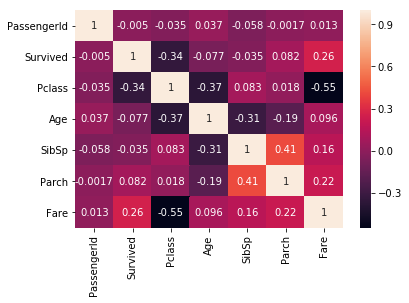

In [14]:
# Feature correlation:
corr = data_num.corr()
sns.heatmap(corr,annot=True)

## Exploration Summary:
* **5 features are object type** ... Name is TEXT....Sex is Ordinal categorical .... Ticket is text ..... Cabin & Embarked are nominal categorical.
* **For NAN values**             ... Age has 177 over 891 .... Cabin has 687 over 891.... Embarked has 2 over 891.
* **for outliers**               ... it may be exist in Age and Highly  exist in Fare.
* **for distribution type**      ... most of the features are right skewed.

# Data Preparation

### data cleaning

##### fixing outliers in Age & Fare:


In [15]:

# Gaussian boundaries for Age only since it is normally distributed
upper_boundary = data['Age'].mean()+3*data['Age'].std()
lower_boundary = data['Age'].mean()-3*data['Age'].std()
print('For Age: the upper boundary is '+str(upper_boundary))
print('For Age: the lower boundary is '+str(lower_boundary))

print('-------------------------------------')
# IQR to calculate boundaries:
for col in ['Age','Fare']:
    IQR = data[col].quantile(0.75)-data[col].quantile(0.25)
    lower_bridge = data[col].quantile(0.25)-(IQR*1.5)
    upper_bridge = data[col].quantile(0.75)+(IQR*1.5)
    print('for ',str(col),' the lower bridge is ' + str(lower_bridge))
    print('for ',str(col),' the upper bridge is ' + str(upper_bridge))
    
print('-------------------------------------')
# Extreme outliers
for col in ['Age','Fare']:
    IQR = data[col].quantile(0.75)-data[col].quantile(0.25)
    lower_bridge = data[col].quantile(0.25)-(IQR*3)
    upper_bridge = data[col].quantile(0.75)+(IQR*3)
    print('for ',str(col),' the lower bridge is ' + str(lower_bridge))
    print('for ',str(col),' the upper bridge is ' + str(upper_bridge))
    

For Age: the upper boundary is 73.27860964406094
For Age: the lower boundary is -13.880374349943303
-------------------------------------
for  Age  the lower bridge is -6.6875
for  Age  the upper bridge is 64.8125
for  Fare  the lower bridge is -26.724
for  Fare  the upper bridge is 65.6344
-------------------------------------
for  Age  the lower bridge is -33.5
for  Age  the upper bridge is 91.625
for  Fare  the lower bridge is -61.358399999999996
for  Fare  the upper bridge is 100.2688


In [16]:
# Age will be fixed by Gaussian boundaries but Fare will be fixed by Extreme
data.Age[data.Age>=73]=73
data.Fare[data.Fare>=100]=100

C:\Users\piush\AppData\Local\Continuum\anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\piush\AppData\Local\Continuum\anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.687913,0.523008,0.381594,27.027169
std,257.353842,0.486592,0.836071,14.490589,1.102743,0.806057,27.296632
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,73.000000,8.000000,6.000000,100.000000


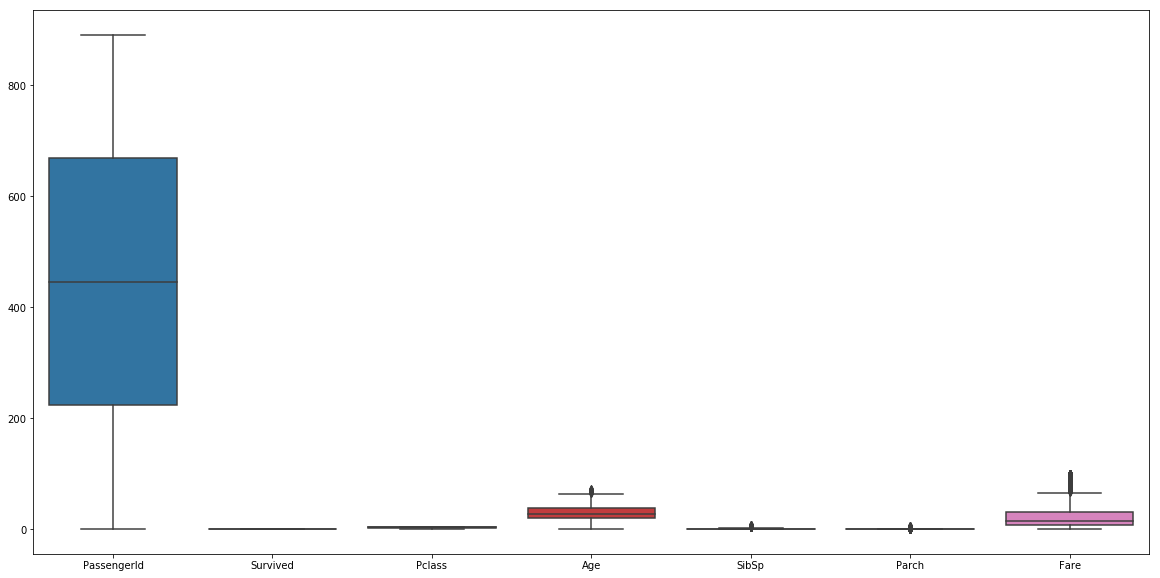

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data.select_dtypes('number'))

##### Impute Missing Values

In [19]:
data['Cabin'].value_counts()


C23 C25 C27        4
G6                 4
B96 B98            4
C22 C26            3
F2                 3
F33                3
E101               3
D                  3
B49                2
E25                2
B58 B60            2
E67                2
B18                2
E44                2
E24                2
C65                2
C126               2
C52                2
B28                2
B5                 2
B22                2
E8                 2
D17                2
C124               2
C2                 2
F4                 2
B57 B59 B63 B66    2
D33                2
F G73              2
E33                2
                  ..
B42                1
A16                1
C110               1
A36                1
B38                1
B78                1
C95                1
C103               1
D9                 1
C32                1
B4                 1
C128               1
B50                1
C45                1
D11                1
B30                1
B101         

In [20]:

data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
s_imputer = SimpleImputer(strategy='most_frequent')
def missing_values(data):
    data['Cabin'].fillna('none',inplace= True)
    data['Age'] = s_imputer.fit_transform(data[['Age']])
    data[[col for col in data.columns if col not in ['Age','Cabin']]] = s_imputer.fit_transform(data[[col for col in data.columns if col not in ['Age','Cabin']]])
    return
missing_values(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Feature Engineering

In [24]:
passenger_Id = data['PassengerId']
y_train = data['Survived']

In [25]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,3
top,"Olsen, Mr. Henry Margido",male,CA. 2343,none,S
freq,1,577,7,687,646


In [26]:
def feature_extraction(data):
    data.drop(['Ticket','Cabin'],axis=1,inplace =True)
    name = pd.Series(data['Name']).str.split(',',expand=True)
    name_ = pd.Series(name[1]).str.split('.',expand=True)
    data.Name = name_[0]
    return
feature_extraction(data)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Mr,male,22.0,1,0,7.2500,S
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C
2,3,1,3,Miss,female,26.0,0,0,7.9250,S
3,4,1,1,Mrs,female,35.0,1,0,53.1000,S
4,5,0,3,Mr,male,35.0,0,0,8.0500,S
5,6,0,3,Mr,male,24.0,0,0,8.4583,Q
6,7,0,1,Mr,male,54.0,0,0,51.8625,S
7,8,0,3,Master,male,2.0,3,1,21.0750,S
8,9,1,3,Mrs,female,27.0,0,2,11.1333,S
9,10,1,2,Mrs,female,14.0,1,0,30.0708,C


In [27]:
data[['Name', 'Survived']].groupby(['Name'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Name,Survived
16,the Countess,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000


In [28]:
data.drop(['Survived','PassengerId'],axis=1, inplace = True)

In [29]:
data.Name.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Capt              1
 Ms                1
 Lady              1
 the Countess      1
 Jonkheer          1
 Mme               1
 Don               1
 Sir               1
Name: Name, dtype: int64

In [30]:
# Replacing Rare names by grouping them as one category
def replace_rare(data):
    data['Name'].replace([' Lady', ' the Countess',' Capt', ' Col',
                                         ' Don', ' Major', ' Sir', ' Jonkheer', ' Dona'], ' Rare',inplace=True)

    data['Name'].replace(' Mlle', ' Miss',inplace=True)
    data['Name'].replace(' Ms', ' Miss',inplace=True)
    data['Name'].replace(' Mme', ' Mrs',inplace=True)
    print(data.Name.value_counts())
    return
replace_rare(data)

 Mr        517
 Miss      185
 Mrs       126
 Master     40
 Rare       10
 Dr          7
 Rev         6
Name: Name, dtype: int64


In [31]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,22.0,1,0,7.2500,S
1,1,Mrs,female,38.0,1,0,71.2833,C
2,3,Miss,female,26.0,0,0,7.9250,S
3,1,Mrs,female,35.0,1,0,53.1000,S
4,3,Mr,male,35.0,0,0,8.0500,S
5,3,Mr,male,24.0,0,0,8.4583,Q
6,1,Mr,male,54.0,0,0,51.8625,S
7,3,Master,male,2.0,3,1,21.0750,S
8,3,Mrs,female,27.0,0,2,11.1333,S
9,2,Mrs,female,14.0,1,0,30.0708,C


In [32]:
# categorical encoding
ohe = OneHotEncoder(handle_unknown='ignore')
col_transformer = make_column_transformer((OrdinalEncoder(categories= [['male','female'],['S','C','Q']]),
                                        ['Sex','Embarked']),remainder = 'passthrough')
def categorical_encoding(data_):
    global data

    cat_name = ohe.fit_transform(data_['Name'].to_numpy().reshape(-1, 1)).toarray()
    ohe_df = pd.DataFrame(cat_name, columns=ohe.get_feature_names())
    data_ = pd.concat([data_, ohe_df], axis=1).drop(['Name'], axis=1)

    data__ = col_transformer.fit_transform(data_)
    data = pd.DataFrame(data__, columns=['Sex','Embarked']+[col for col in data_.columns if col not in ['Sex','Embarked']]) 
    
    return data

######## OneHotEncoding for All

#col_transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
 #                                          ['Sex','Name','Embarked']),remainder = 'passthrough')
#def categorical_encoding(data_):
 #   global data
  #  data__ = col_transformer.fit_transform(data_)
   # data = pd.DataFrame(data__) 
    #data.columns = [0 ,1, 2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'Age' ,14 ,15, 'Fare']
    #return data
    
categorical_encoding(data)

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare,x0_ Dr,x0_ Master,x0_ Miss,x0_ Mr,x0_ Mrs,x0_ Rare,x0_ Rev
0,0.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,2.0,3.0,24.0,0.0,0.0,8.4583,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,1.0,54.0,0.0,0.0,51.8625,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,3.0,2.0,3.0,1.0,21.0750,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,3.0,27.0,0.0,2.0,11.1333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,1.0,2.0,14.0,1.0,0.0,30.0708,0.0,0.0,0.0,0.0,1.0,0.0,0.0


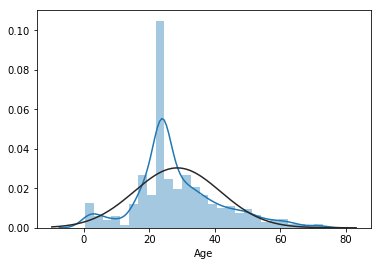

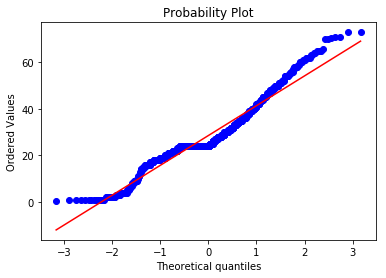

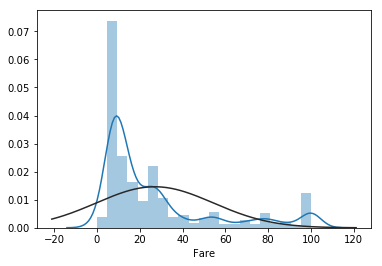

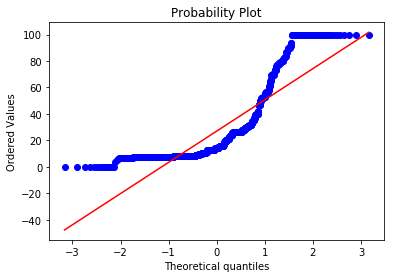

In [33]:
# Transform Features (Normality)
cols = ['Age' ,'Fare']
for col in cols:
    fig = plt.figure()

    sns.distplot(data[col], fit=norm);
    fig = plt.figure()
    stats.probplot(data[col], plot=plt)

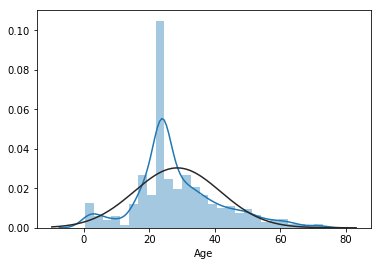

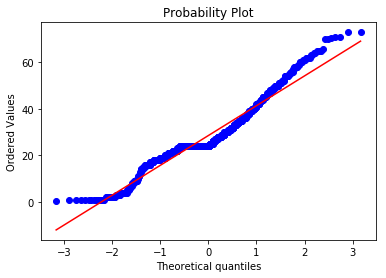

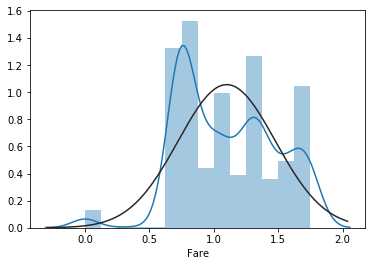

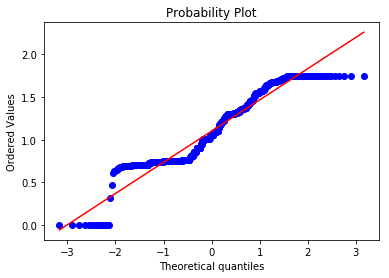

In [34]:
def transform_data(data):
    data['Fare'], parameters = stats.boxcox(data['Fare'].replace(0,1))
    data['Fare'], parameters = stats.boxcox(data['Fare'].replace(0,1))
    return
transform_data(data)
for col in cols:
    fig = plt.figure()

    sns.distplot(data[col], fit=norm);
    fig = plt.figure()
    stats.probplot(data[col], plot=plt)

### Feature Scaling

In [35]:
# Feature Scaling for Age attribute
std_scaler = StandardScaler()
data.Age = std_scaler.fit_transform(data.Age.to_numpy().reshape(-1,1))


### Making Processing PipeLine for test and new data

In [36]:
def processing_pipeline(test):
    
    def missing_values_(test):
        test['PassengerId'] , test['Survived'] = passengerid , y_train
        test['Cabin'].fillna('none',inplace= True)
        test['Age'] = I_imputer.transform(test[['Age']])
        test[[col for col in test.columns if col not in ['Age','Cabin']]] = s_imputer.transform(test[[col for col in test.columns if col not in ['Age','Cabin']]])
        test.drop(['PassengerId','Survived'],axis = 1, inplace=True)
        return

    missing_values_(test)
    
    feature_extraction(test)

    replace_rare(test)

    def categorical_encoding(test_):
        global test

        cat_name = ohe.transform(test_['Name'].to_numpy().reshape(-1, 1)).toarray()
        ohe_df = pd.DataFrame(cat_name, columns=ohe.get_feature_names())
        test_ = pd.concat([test_, ohe_df], axis=1).drop(['Name'], axis=1)

        data__ = col_transformer.transform(test_)
        test = pd.DataFrame(data__, columns=['Sex','Embarked']+[col for col in test_.columns if col not in ['Sex','Embarked']]) 
    
        return 

    categorical_encoding(test)
    
    def transform_data():
        global test
        test['Fare'], parameters = stats.boxcox(test['Fare'].replace(0,1))
        test['Fare'], parameters = stats.boxcox(test['Fare'].replace(0,1))
        return
    
    transform_data()
    
    def std():
        global test
        test.Age = std_scaler.transform(test.Age.to_numpy().reshape(-1,1))
        return
    std()
    return test

## Preparation Summary:
* **missing_values** Function
* **Feature_extraction** Function
* **replace_rare** Function
* **categorical_encoding** Function
* **transform_data** Function
* **Feature Scaling** Code
* **Processing_pipeline** Function

# Training models

In [47]:
# Now convert to an array
x = np.array(data, dtype = 'float64')
y = np.array(y_train, dtype = 'float64')

In [48]:
# Now we convert the arrays to PyTorch tensors
x = torch.tensor(x)
# We add an extra dimension to convert this array to 2D
y = torch.tensor(y).unsqueeze(1)

In [49]:
print(x.shape)
print(y.shape)

torch.Size([891, 14])
torch.Size([891, 1])


In [50]:
class Dataset(Dataset):

    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def __getitem__(self,index):
        # Get one item from the dataset
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [51]:
dataset = Dataset(x,y)

In [52]:
len(dataset)

891

In [53]:
# Load the data to your dataloader for batch processing and shuffling
train_loader = torch.utils.data.DataLoader(dataset=dataset,
                                           batch_size=32,
                                           shuffle=True)

In [55]:
# Let's have a look at the data loader
print("There is {} batches in the dataset".format(len(train_loader)))
for (x,y) in train_loader:
    print("For one iteration (batch), there is:")
    print("Data:    {}".format(x.shape))
    print("Labels:  {}".format(y.shape))
    break

There is 28 batches in the dataset
For one iteration (batch), there is:
Data:    torch.Size([32, 14])
Labels:  torch.Size([32, 1])


![demo](https://user-images.githubusercontent.com/30661597/60379583-246e5e80-9a68-11e9-8b7f-a4294234c201.png)

In [58]:
# Now let's build the above network
class Model(nn.Module):
    def __init__(self, input_features):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_features, 5)
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 3)
        self.fc4 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

$H_{p}(q)=-\frac{1}{N} \sum_{i=1}^{N} y_{i} \cdot \log \left(p\left(y_{i}\right)\right)+\left(1-y_{i}\right) \cdot \log \left(1-p\left(y_{i}\right)\right)$


cost = -(Y * torch.log(hypothesis) + (1 - Y) * torch.log(1 - hypothesis)).mean()

In [60]:
# Create the network (an object of the Net class)
net = Model(x.shape[1])
#In Binary Cross Entropy: the input and output should have the same shape 
#size_average = True --> the losses are averaged over observations for each minibatch
criterion = torch.nn.BCELoss(size_average=True)   
# We will use SGD with momentum with a learning rate of 0.1
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

In [61]:
# Train the network 
num_epochs = 200
for epoch in range(num_epochs):
    for inputs,labels in train_loader:
        inputs = inputs.float()
        labels = labels.float()
        # Feed Forward - call the propogation
        output = net(inputs)
        # Loss Calculation
        loss = criterion(output, labels)
        # Clear the gradient buffer (we don't want to accumulate gradients)
        optimizer.zero_grad()
        # Backpropagation 
        loss.backward()
        # Weight Update: w <-- w - lr * gradient
        optimizer.step()
        
    #Accuracy
    # Since we are using a sigmoid, we will need to perform some thresholding
    output = (output>0.5).float()
    # Accuracy: (output == labels).float().sum() / output.shape[0]
    accuracy = (output == labels).float().mean()
    # Print statistics 
    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1,num_epochs, loss, accuracy))

Epoch 1/200, Loss: 0.561, Accuracy: 0.815
Epoch 2/200, Loss: 0.520, Accuracy: 0.741
Epoch 3/200, Loss: 0.333, Accuracy: 0.889
Epoch 4/200, Loss: 0.347, Accuracy: 0.852
Epoch 5/200, Loss: 0.549, Accuracy: 0.741
Epoch 6/200, Loss: 0.306, Accuracy: 0.889
Epoch 7/200, Loss: 0.342, Accuracy: 0.852
Epoch 8/200, Loss: 0.387, Accuracy: 0.815
Epoch 9/200, Loss: 0.362, Accuracy: 0.852
Epoch 10/200, Loss: 0.560, Accuracy: 0.741
Epoch 11/200, Loss: 0.500, Accuracy: 0.852
Epoch 12/200, Loss: 0.317, Accuracy: 0.926
Epoch 13/200, Loss: 0.341, Accuracy: 0.852
Epoch 14/200, Loss: 0.662, Accuracy: 0.741
Epoch 15/200, Loss: 0.556, Accuracy: 0.778
Epoch 16/200, Loss: 0.311, Accuracy: 0.926
Epoch 17/200, Loss: 0.192, Accuracy: 0.926
Epoch 18/200, Loss: 0.283, Accuracy: 0.926
Epoch 19/200, Loss: 0.508, Accuracy: 0.815
Epoch 20/200, Loss: 0.482, Accuracy: 0.778
Epoch 21/200, Loss: 0.383, Accuracy: 0.852
Epoch 22/200, Loss: 0.423, Accuracy: 0.778
Epoch 23/200, Loss: 0.361, Accuracy: 0.815
Epoch 24/200, Loss: 

Epoch 190/200, Loss: 0.344, Accuracy: 0.889
Epoch 191/200, Loss: 0.362, Accuracy: 0.778
Epoch 192/200, Loss: 0.628, Accuracy: 0.667
Epoch 193/200, Loss: 0.640, Accuracy: 0.704
Epoch 194/200, Loss: 0.184, Accuracy: 0.963
Epoch 195/200, Loss: 0.127, Accuracy: 1.000
Epoch 196/200, Loss: 0.251, Accuracy: 0.852
Epoch 197/200, Loss: 0.499, Accuracy: 0.815
Epoch 198/200, Loss: 0.310, Accuracy: 0.852
Epoch 199/200, Loss: 0.237, Accuracy: 0.926
Epoch 200/200, Loss: 0.496, Accuracy: 0.741
